<a href="https://colab.research.google.com/github/JohnCiubuc/Suicide-Detection-GPT2/blob/main/suicide_detection_gpt2_finetune_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### © Copyright 2020 [George Mihaila](https://github.com/gmihaila).

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# **GPT2 For Text Classification using Hugging Face 🤗 Transformers**

## **Complete tutorial on how to use GPT2 for text classification.**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gmihaila/ml_things/blob/master/notebooks/pytorch/pretrain_transformers_pytorch.ipynb) &nbsp;
[![Generic badge](https://img.shields.io/badge/GitHub-Source-greensvg)](https://github.com/gmihaila/ml_things/blob/master/notebooks/pytorch/pretrain_transformers_pytorch.ipynb)
[![Generic badge](https://img.shields.io/badge/Article-Medium-black.svg)](https://medium.com/@gmihaila/fine-tune-transformers-in-pytorch-using-transformers-57b40450635)
[![License](https://img.shields.io/badge/License-Apache%202.0-blue.svg)](https://opensource.org/licenses/Apache-2.0)


<br>

**Disclaimer:** *The format of this tutorial notebook is very similar to my other tutorial notebooks. This is done intentionally in order to keep readers familiar with my format.*

<br>

This notebook is used to fine-tune GPT2 model for text classification using [Huggingface](https://huggingface.co/transformers/) [transformers](https://github.com/huggingface/transformers) library on a custom dataset.

Hugging Face is very nice to us to include all the functionality needed for GPT2 to be used in classification tasks. Thank you Hugging Face! 

I wasn't able to find much information on how to use GPT2 for classification so I decided to make this tutorial using similar structure with other transformers models.

**Main idea:**
Since GPT2 is a decoder transformer, the last token of the input sequence is used to make predictions about the next token that should follow the input. This means that the last token of the input sequence contains all the information needed in the prediction. With this in mind we can use that information to make a prediction in a classification task instead of generation task.

In other words, instead of using first token embedding to make prediction like we do in Bert, we will use the last token embedding to make prediction with GPT2.

Since we only cared about the first token in Bert, we were padding to the right. Now in GPT2 we are using the last token for prediction so we will need to pad on the left. Because of a nice upgrade to HuggingFace Transformers we are able to configure the GPT2 Tokenizer to do just that.


<br>

## **What should I know for this notebook?**

Since I am using PyTorch to fine-tune our transformers models any knowledge on PyTorch is very useful.

Knowing a little bit about the [transformers](https://github.com/huggingface/transformers) library helps too.

<br>

## **How to use this notebook?**


Like with every project, I built this notebook with reusability in mind.

All changes will happen in the data processing part where you need to customize the PyTorch Dataset, Data Collator and DataLoader to fit your own data needs.

All parameters that can be changed are under the **Imports** section. Each parameter is nicely commented and structured to be as intuitive as possible.

<br>

## **Dataset**

This notebook will cover pretraining transformers on a custom dataset. I will use the well known movies reviews positive - negative labeled [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

The description provided on the Stanford website:

*This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details.*

**Why this dataset?** I believe is an easy to understand and use dataset for classification. I think sentiment data is always fun to work with.

<br>

## **Coding**

Now let's do some coding! We will go through each coding cell in the notebook and describe what it does, what's the code, and when is relevant - show the output.

I made this format to be easy to follow if you decide to run each code cell in your own python notebook.

When I learn from a tutorial I always try to replicate the results. I believe it's easy to follow along if you have the code next to the explanations.

<br>
 

# **Run this first**

Matplotlib is borked. you need to install this version first. Install and restart runtime after install, and you're good to go!

In [1]:

# fix matlob req issues
# You may need to restart runtime if matlib is still being annoying
!pip install matplotlib==3.4.0

     |████████████████████████████████| 10.3MB 1.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


## **Downloads**

Download the *Large Movie Review Dataset* and unzip it locally.


In [1]:
!wget -q -nc https://github.com/JohnCiubuc/Suicide-Detection-GPT2/blob/main/sd.tar.xz?raw=true
!tar -xvf /content/sd.tar.xz?raw=true

Streaming output truncated to the last 5000 lines.
train/non-suicide/6.txt
train/non-suicide/23.txt
train/non-suicide/40.txt
train/non-suicide/102.txt
train/non-suicide/123.txt
train/non-suicide/132.txt
train/non-suicide/138.txt
train/non-suicide/149.txt
train/non-suicide/152.txt
train/non-suicide/164.txt
train/non-suicide/166.txt
train/non-suicide/173.txt
train/non-suicide/183.txt
train/non-suicide/188.txt
train/non-suicide/198.txt
train/non-suicide/199.txt
train/non-suicide/206.txt
train/non-suicide/236.txt
train/non-suicide/240.txt
train/non-suicide/242.txt
train/non-suicide/247.txt
train/non-suicide/265.txt
train/non-suicide/270.txt
train/non-suicide/272.txt
train/non-suicide/304.txt
train/non-suicide/323.txt
train/non-suicide/343.txt
train/non-suicide/376.txt
train/non-suicide/382.txt
train/non-suicide/383.txt
train/non-suicide/391.txt
train/non-suicide/419.txt
train/non-suicide/423.txt
train/non-suicide/436.txt
train/non-suicide/445.txt
train/non-suicide/486.txt
train/non-suicide

## **Installs**

* **[transformers](https://github.com/huggingface/transformers)** library needs to be installed to use all the awesome code from Hugging Face. To get the latest version I will install it straight from GitHub.

* **[ml_things](https://github.com/gmihaila/ml_things)** library used for various machine learning related tasks. I created this library to reduce the amount of code I need to write for each machine learning project.


In [2]:
# Fix pre-req install issue
!pip install imgaug==0.2.5

     |████████████████████████████████| 563kB 9.6MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp37-none-any.whl size=561439 sha256=2036a9be5e2d8b506ce999cba27901a6e2805aa54c74c3f724739be4df8f42fc
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [3]:
# Install transformers library.
!pip install -q git+https://github.com/huggingface/transformers.git
# Install helper functions.
!pip install -q git+https://github.com/gmihaila/ml_things.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.3MB 9.9MB/s 
     |████████████████████████████████| 901kB 38.1MB/s 
     |████████████████████████████████| 71kB 5.3MB/s 


## **Imports**

Import all needed libraries for this notebook.

Declare parameters used for this notebook:

* `set_seed(123)` - Always good to set a fixed seed for reproducibility.
* `epochs` - Number of training epochs (authors recommend between 2 and 4).
* `batch_size` - Number of batches - depending on the max sequence length and GPU memory. For 512 sequence length a batch of 10 USUALY works without cuda memory issues. For small sequence length can try batch of 32 or higher.
max_length - Pad or truncate text sequences to a specific length. I will set it to 60 to speed up training.
* `device` - Look for gpu to use. Will use cpu by default if no gpu found.
* `model_name_or_path` - Name of transformers model - will use already pretrained model. Path of transformer model - will load your own model from local disk. In this tutorial I will use `gpt2` model.
* `labels_ids` - Dictionary of labels and their id - this will be used to convert string labels to numbers.
* `n_labels` - How many labels are we using in this dataset. This is used to decide size of classification head.

In [4]:
import io
import os
import torch
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from ml_things import plot_dict, plot_confusion_matrix, fix_text
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW, 
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)

# Set seed for reproducibility.
set_seed(123)

# Number of training epochs (authors on fine-tuning Bert recommend between 2 and 4).
epochs = 2

# Number of batches - depending on the max sequence length and GPU memory.
# For 512 sequence length batch of 10 works without cuda memory issues.
# For small sequence length can try batch of 32 or higher.
batch_size = 32

# Pad or truncate text sequences to a specific length
# if `None` it will use maximum sequence of word piece tokens allowed by model.
max_length = 60

# Look for gpu to use. Will use `cpu` by default if no gpu found.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Name of transformers model - will use already pretrained model.
# Path of transformer model - will load your own model from local disk.
model_name_or_path = 'gpt2'

# Dictionary of labels and their id - this will be used to convert.
# String labels to number ids.
labels_ids = {'suicide': 0, 'non-suicide': 1}

# How many labels are we using in training.
# This is used to decide size of classification head.
n_labels = len(labels_ids)

## **Helper Functions**

I like to keep all Classes and functions that will be used in this notebook under this section to help maintain a clean look of the notebook:

<br>

**MovieReviewsDataset(Dataset)**

If you worked with PyTorch before, this is pretty standard. We need this class to read in our dataset, parse it and return texts with their associated labels.

In this class I only need to read in the content of each file, use fix_text to fix any Unicode problems and keep track of positive and negative sentiments.

I will append all texts and labels in lists.

There are three main parts of this PyTorch Dataset class:

* **init()** where we read in the dataset and transform text and labels into numbers.
* **len()** where we need to return the number of examples we read in. This is used when calling len(MovieReviewsDataset()).
* **getitem()** always takes as an input an int value that represents which example from our examples to return from our dataset. If a value of 3 is passed, we will return the example form our dataset at position 3.

<br>

**Gpt2ClassificationCollator**

I use this class to create the Data Collator. This will be used in the DataLoader to create the bathes of data that get fed to the model. I use the tokenizer and label encoder on each sequence to convert texts and labels to number.

Lucky for us, Hugging Face thought of everything and made the tokenizer do all the heavy lifting (split text into tokens, padding, truncating, encode text into numbers) and is very easy to use!

There are two main parts of this Data Collator class:

* **init()** where we initialize the tokenizer we plan to use, how to encode our labels and if we need to set the sequence length to a different value.

* **__call__()** used as function collator that takes as input a batch of data examples. It needs to return an object with the format that can be fed to our model. Luckily our tokenizer does that for us and returns a dictionary of variables ready to be fed to the model in this way: `model(**inputs)`. Since we are fine-tuning the model I also included the labels.





<br>

**train(dataloader, optimizer_, scheduler_, device_)**

I created this function to perform a full pass through the DataLoader object (the DataLoader object is created from our Dataset* type object using the **MovieReviewsDataset class). This is basically one epoch train through the entire dataset.

The dataloader is created from PyTorch DataLoader which takes the object created from MovieReviewsDataset class and puts each example in batches. This way we can feed our model batches of data!

The optimizer_ and scheduler_ are very common in PyTorch. They are required to update the parameters of our model and update our learning rate during training. There is a lot more than that but I won't go into details. This can actually be a huge rabbit hole since A LOT happens behind these functions that we don't need to worry. Thank you PyTorch!

In the process we keep track of the actual labels and the predicted labels along with the loss.

<br>

**validation(dataloader, device_)**

I implemented this function in a very similar way as train but without the parameters update, backward pass and gradient decent part. We don't need to do all of those VERY computationally intensive tasks because we only care about our model's predictions.

I use the DataLoader in a similar way as in train to get out batches to feed to our model.

In the process I keep track of the actual labels and the predicted labels along with the loss.


In [5]:
class MovieReviewsDataset(Dataset):
  r"""PyTorch Dataset class for loading data.

  This is where the data parsing happens.

  This class is built with reusability in mind: it can be used as is as.

  Arguments:

    path (:obj:`str`):
        Path to the data partition.

  """

  def __init__(self, path, use_tokenizer):

    # Check if path exists.
    if not os.path.isdir(path):
      # Raise error if path is invalid.
      raise ValueError('Invalid `path` variable! Needs to be a directory')
    self.texts = []
    self.labels = []
    # Since the labels are defined by folders with data we loop 
    # through each label.
    for label in ['suicide', 'non-suicide']:
      sentiment_path = os.path.join(path, label)

      # Get all files from path.
      files_names = os.listdir(sentiment_path)#[:10] # Sample for debugging.
      # Go through each file and read its content.
      for file_name in tqdm(files_names, desc=f'{label} files'):
        file_path = os.path.join(sentiment_path, file_name)

        # Read content.
        content = io.open(file_path, mode='r', encoding='utf-8').read()
        # Fix any unicode issues.
        content = fix_text(content)
        # Save content.
        self.texts.append(content)
        # Save encode labels.
        self.labels.append(label)

    # Number of exmaples.
    self.n_examples = len(self.labels)
    

    return

  def __len__(self):
    r"""When used `len` return the number of examples.

    """
    
    return self.n_examples

  def __getitem__(self, item):
    r"""Given an index return an example from the position.
    
    Arguments:

      item (:obj:`int`):
          Index position to pick an example to return.

    Returns:
      :obj:`Dict[str, str]`: Dictionary of inputs that contain text and 
      asociated labels.

    """

    return {'text':self.texts[item],
            'label':self.labels[item]}



class Gpt2ClassificationCollator(object):
    r"""
    Data Collator used for GPT2 in a classificaiton rask. 
    
    It uses a given tokenizer and label encoder to convert any text and labels to numbers that 
    can go straight into a GPT2 model.

    This class is built with reusability in mind: it can be used as is as long
    as the `dataloader` outputs a batch in dictionary format that can be passed 
    straight into the model - `model(**batch)`.

    Arguments:

      use_tokenizer (:obj:`transformers.tokenization_?`):
          Transformer type tokenizer used to process raw text into numbers.

      labels_ids (:obj:`dict`):
          Dictionary to encode any labels names into numbers. Keys map to 
          labels names and Values map to number associated to those labels.

      max_sequence_len (:obj:`int`, `optional`)
          Value to indicate the maximum desired sequence to truncate or pad text
          sequences. If no value is passed it will used maximum sequence size
          supported by the tokenizer and model.

    """

    def __init__(self, use_tokenizer, labels_encoder, max_sequence_len=None):

        # Tokenizer to be used inside the class.
        self.use_tokenizer = use_tokenizer
        # Check max sequence length.
        self.max_sequence_len = use_tokenizer.model_max_length if max_sequence_len is None else max_sequence_len
        # Label encoder used inside the class.
        self.labels_encoder = labels_encoder

        return

    def __call__(self, sequences):
        r"""
        This function allowes the class objesct to be used as a function call.
        Sine the PyTorch DataLoader needs a collator function, I can use this 
        class as a function.

        Arguments:

          item (:obj:`list`):
              List of texts and labels.

        Returns:
          :obj:`Dict[str, object]`: Dictionary of inputs that feed into the model.
          It holddes the statement `model(**Returned Dictionary)`.
        """

        # Get all texts from sequences list.
        texts = [sequence['text'] for sequence in sequences]
        # Get all labels from sequences list.
        labels = [sequence['label'] for sequence in sequences]
        # Encode all labels using label encoder.
        labels = [self.labels_encoder[label] for label in labels]
        # Call tokenizer on all texts to convert into tensors of numbers with 
        # appropriate padding.
        inputs = self.use_tokenizer(text=texts, return_tensors="pt", padding=True, truncation=True,  max_length=self.max_sequence_len)
        # Update the inputs with the associated encoded labels as tensor.
        inputs.update({'labels':torch.tensor(labels)})

        return inputs


def train(dataloader, optimizer_, scheduler_, device_):
  r"""
  Train pytorch model on a single pass through the data loader.

  It will use the global variable `model` which is the transformer model 
  loaded on `_device` that we want to train on.

  This function is built with reusability in mind: it can be used as is as long
    as the `dataloader` outputs a batch in dictionary format that can be passed 
    straight into the model - `model(**batch)`.

  Arguments:

      dataloader (:obj:`torch.utils.data.dataloader.DataLoader`):
          Parsed data into batches of tensors.

      optimizer_ (:obj:`transformers.optimization.AdamW`):
          Optimizer used for training.

      scheduler_ (:obj:`torch.optim.lr_scheduler.LambdaLR`):
          PyTorch scheduler.

      device_ (:obj:`torch.device`):
          Device used to load tensors before feeding to model.

  Returns:

      :obj:`List[List[int], List[int], float]`: List of [True Labels, Predicted
        Labels, Train Average Loss].
  """

  # Use global variable for model.
  global model

  # Tracking variables.
  predictions_labels = []
  true_labels = []
  # Total loss for this epoch.
  total_loss = 0

  # Put the model into training mode.
  model.train()

  # For each batch of training data...
  for batch in tqdm(dataloader, total=len(dataloader)):

    # Add original labels - use later for evaluation.
    true_labels += batch['labels'].numpy().flatten().tolist()
    
    # move batch to device
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}
    
    # Always clear any previously calculated gradients before performing a
    # backward pass.
    model.zero_grad()

    # Perform a forward pass (evaluate the model on this training batch).
    # This will return the loss (rather than the model output) because we
    # have provided the `labels`.
    # The documentation for this a bert model function is here: 
    # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
    outputs = model(**batch)

    # The call to `model` always returns a tuple, so we need to pull the 
    # loss value out of the tuple along with the logits. We will use logits
    # later to calculate training accuracy.
    loss, logits = outputs[:2]

    # Accumulate the training loss over all of the batches so that we can
    # calculate the average loss at the end. `loss` is a Tensor containing a
    # single value; the `.item()` function just returns the Python value 
    # from the tensor.
    total_loss += loss.item()

    # Perform a backward pass to calculate the gradients.
    loss.backward()

    # Clip the norm of the gradients to 1.0.
    # This is to help prevent the "exploding gradients" problem.
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # Update parameters and take a step using the computed gradient.
    # The optimizer dictates the "update rule"--how the parameters are
    # modified based on their gradients, the learning rate, etc.
    optimizer.step()

    # Update the learning rate.
    scheduler.step()

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()

    # Convert these logits to list of predicted labels values.
    predictions_labels += logits.argmax(axis=-1).flatten().tolist()

  # Calculate the average loss over the training data.
  avg_epoch_loss = total_loss / len(dataloader)
  
  # Return all true labels and prediction for future evaluations.
  return true_labels, predictions_labels, avg_epoch_loss



def validation(dataloader, device_):
  r"""Validation function to evaluate model performance on a 
  separate set of data.

  This function will return the true and predicted labels so we can use later
  to evaluate the model's performance.

  This function is built with reusability in mind: it can be used as is as long
    as the `dataloader` outputs a batch in dictionary format that can be passed 
    straight into the model - `model(**batch)`.

  Arguments:

    dataloader (:obj:`torch.utils.data.dataloader.DataLoader`):
          Parsed data into batches of tensors.

    device_ (:obj:`torch.device`):
          Device used to load tensors before feeding to model.

  Returns:
    
    :obj:`List[List[int], List[int], float]`: List of [True Labels, Predicted
        Labels, Train Average Loss]
  """

  # Use global variable for model.
  global model

  # Tracking variables
  predictions_labels = []
  true_labels = []
  #total loss for this epoch.
  total_loss = 0

  # Put the model in evaluation mode--the dropout layers behave differently
  # during evaluation.
  model.eval()

  # Evaluate data for one epoch
  for batch in tqdm(dataloader, total=len(dataloader)):

    # add original labels
    true_labels += batch['labels'].numpy().flatten().tolist()

    # move batch to device
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have
        # not provided labels.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(**batch)

        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple along with the logits. We will use logits
        # later to to calculate training accuracy.
        loss, logits = outputs[:2]
        
        global tests
        tests = logits
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()
        
        # get predicitons to list
        predict_content = logits.argmax(axis=-1).flatten().tolist()

        # update list
        predictions_labels += predict_content

  # Calculate the average loss over the training data.
  avg_epoch_loss = total_loss / len(dataloader)

  # Return all true labels and prediciton for future evaluations.
  return true_labels, predictions_labels, avg_epoch_loss


def predict(dataloader, device_):
  r"""Validation function to evaluate model performance on a 
  separate set of data.

  This function will return the true and predicted labels so we can use later
  to evaluate the model's performance.

  This function is built with reusability in mind: it can be used as is as long
    as the `dataloader` outputs a batch in dictionary format that can be passed 
    straight into the model - `model(**batch)`.

  Arguments:

    dataloader (:obj:`torch.utils.data.dataloader.DataLoader`):
          Parsed data into batches of tensors.

    device_ (:obj:`torch.device`):
          Device used to load tensors before feeding to model.

  Returns:
    
    :obj:`List[List[int], List[int], float]`: List of [True Labels, Predicted
        Labels, Train Average Loss]
  """

  # Use global variable for model.
  global model

  # Tracking variables
  predictions_labels = []

  # Put the model in evaluation mode--the dropout layers behave differently
  # during evaluation.
  model.eval()

  # Evaluate data for one epoch
  for batch in tqdm(dataloader, total=len(dataloader)):

    # move batch to device
    batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}
    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have
        # not provided labels.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(**batch)

        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple along with the logits. We will use logits
        # later to to calculate training accuracy.
        loss, logits = outputs[:2]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        # get predicitons to list
        predict_content = logits.argmax(axis=-1).flatten().tolist()
        # update list
        predictions_labels += predict_content

  # Return prediction
  return  predictions_labels

## Virtual Loader

This lets you type text to predict. load it via the provided function call:

```
# loadText(string)
```

 and predict it straight from the model

In [6]:
class virtualLoad(Dataset):
  def __init__(self):
    self.texts=[]
    self.labels=[]
    self.n_examples = len(self.labels)
    
    return
  def __len__(self):
    return self.n_examples
  def __getitem__(self, item):
    return {'text':self.texts[item],
            'label':self.labels[item]}
  def getText(self,item):
    return self.texts[item]
  def loadText(self, text):
    self.texts.append(text)
    self.labels.append('non-suicide') # can use 'suicide' label too. This is needed for the model to load the item, but it's not used in predicting
    self.n_examples = len(self.labels)


## **Load Model and Tokenizer**

Loading the three essential parts of the pretrained GPT2 transformer: configuration, tokenizer and model. 

For this example I will use `gpt2` from HuggingFace pretrained transformers. You can use any variations of GP2 you want.

In creating the `model_config` I will mention the number of labels I need for my classification task. Since I only predict two sentiments: positive and negative I will only need two labels for `num_labels`.

Creating the `tokenizer` is pretty standard when using the Transformers library. After creating the tokenizer it is critical for this tutorial to set padding to the left `tokenizer.padding_side = "left"` and initialize the padding token to `tokenizer.eos_token` which is the GPT2's original end of sequence token. This is the most essential part of this tutorial since GPT2 uses the last token for prediction so we need to pad to the left.

HuggingFace already did most of the work for us and added a classification layer to the GPT2 model. In creating the model I used `GPT2ForSequenceClassification`.
Since we have a custom padding token we need to initialize it for the model using `model.config.pad_token_id`.
Finally we will need to move the model to the device we defined earlier.



In [7]:
# Get model configuration.
print('Loading configuraiton...')
model_config = GPT2Config.from_pretrained(pretrained_model_name_or_path=model_name_or_path, num_labels=n_labels)

# Get model's tokenizer.
print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained(pretrained_model_name_or_path=model_name_or_path)
# default to left padding
tokenizer.padding_side = "left"
# Define PAD Token = EOS Token = 50256
tokenizer.pad_token = tokenizer.eos_token


# Get the actual model.
print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_name_or_path, config=model_config)

# resize model embedding to match new tokenizer
model.resize_token_embeddings(len(tokenizer))

# fix model padding token id
model.config.pad_token_id = model.config.eos_token_id

# Load model to defined device.
model.to(device)
print('Model loaded to `%s`'%device)

Loading configuraiton...



Loading tokenizer...



Loading model...


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded to `cuda`


## **Dataset and Collator**

This is where I create the PyTorch Dataset and Data Loader with Data Collator objects that will be used to feed data into our model.

This is where I use the **MovieReviewsDataset** class to create the PyTorch Dataset that will return texts and labels.

Since we need to input numbers to our model we need to convert the texts and labels to numbers. This is the purpose of a collator! It takes data outputted by the PyTorch Dataset and passed through the Data Collator function to output the sequence for our model.

I'm keeping the tokenizer away from the PyTorch Dataset to make the code cleaner and better structured. You can obviously use the tokenizer inside the PyTorch Dataset and output sequences that can be used straight into the model without using a Data Collator.

I strongly recommend to use a validation text file in order to determine how much training is needed in order to avoid overfitting. After you figure out what parameters yield the best results, the validation file can be incorporated in train and run a final train with the whole dataset.

The data collator is used to format the PyTorch Dataset outputs to match the inputs needed for GPT2.

In [8]:
# Create data collator to encode text and labels into numbers.
gpt2_classificaiton_collator = Gpt2ClassificationCollator(use_tokenizer=tokenizer, 
                                                          labels_encoder=labels_ids, 
                                                          max_sequence_len=max_length)


print('Dealing with Train...')
# Create pytorch dataset.
train_dataset = MovieReviewsDataset(path='/content/train', 
                               use_tokenizer=tokenizer)
print('Created `train_dataset` with %d examples!'%len(train_dataset))

# Move pytorch dataset into dataloader.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=gpt2_classificaiton_collator)
print('Created `train_dataloader` with %d batches!'%len(train_dataloader))

print()

print('Dealing with Validation...')
# Create pytorch dataset.
valid_dataset =  MovieReviewsDataset(path='/content/test', 
                               use_tokenizer=tokenizer)
print('Created `valid_dataset` with %d examples!'%len(valid_dataset))

# Move pytorch dataset into dataloader.

valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)
print('Created `eval_dataloader` with %d batches!'%len(valid_dataloader))

Dealing with Train...



Created `train_dataset` with 20000 examples!
Created `train_dataloader` with 625 batches!

Dealing with Validation...



Created `valid_dataset` with 9998 examples!
Created `eval_dataloader` with 313 batches!


## **Train**

I created optimizer and scheduler use by PyTorch in training. I used most common parameters used by transformers models.

I looped through the number of defined epochs and call the **train** and **validation** functions.

I'm trying to output similar info after each epoch as Keras: *train_loss:  - val_loss:  - train_acc: - valid_acc*.

After training, plot train and validation loss and accuracy curves to check how the training went.

**Note:** *The training plots might look a little weird: The validation accuracy starts higher than training accuracy and the validation loss starts lower than the training loss. Normally this will be the opposite. I assume the data split just happen to be easier for the validation part or too hard for training part or both. Since this tutorial is about using GPT2 for classification I will not worry about the results of the model too much.*

Epoch



Training on batches...



Validation on batches...



  train_loss: 0.24774 - val_loss: 0.09110 - train_acc: 0.89670 - valid_acc: 0.96829


Training on batches...



Validation on batches...



  train_loss: 0.09281 - val_loss: 0.09712 - train_acc: 0.96700 - valid_acc: 0.96599




/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


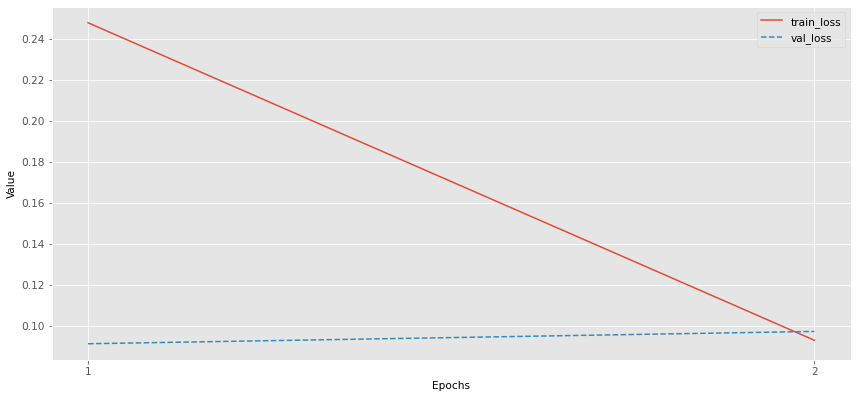

/usr/local/lib/python3.7/dist-packages/ml_things/plot_functions.py:410: DeprecationWarning: `magnify` needs to have value in [0,1]! `1.2` will be converted to `0.1` as default.
  DeprecationWarning)


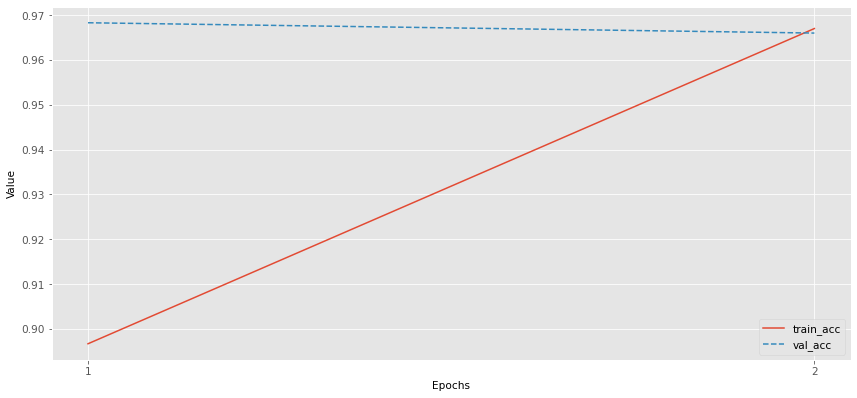

In [9]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # default is 1e-8.
                  )

# Total number of training steps is number of batches * number of epochs.
# `train_dataloader` contains batched data so `len(train_dataloader)` gives 
# us the number of batches.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# Store the average loss after each epoch so we can plot them.
all_loss = {'train_loss':[], 'val_loss':[]}
all_acc = {'train_acc':[], 'val_acc':[]}

# Loop through each epoch.
print('Epoch')
for epoch in tqdm(range(epochs)):
  print()
  print('Training on batches...')
  # Perform one full pass over the training set.
  train_labels, train_predict, train_loss = train(train_dataloader, optimizer, scheduler, device)
  train_acc = accuracy_score(train_labels, train_predict)

  # Get prediction form model on validation data. 
  print('Validation on batches...')
  valid_labels, valid_predict, val_loss = validation(valid_dataloader, device)
  val_acc = accuracy_score(valid_labels, valid_predict)

  # Print loss and accuracy values to see how training evolves.
  print("  train_loss: %.5f - val_loss: %.5f - train_acc: %.5f - valid_acc: %.5f"%(train_loss, val_loss, train_acc, val_acc))
  print()

  # Store the loss value for plotting the learning curve.
  all_loss['train_loss'].append(train_loss)
  all_loss['val_loss'].append(val_loss)
  all_acc['train_acc'].append(train_acc)
  all_acc['val_acc'].append(val_acc)

# Plot loss curves.
plot_dict(all_loss, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

# Plot accuracy curves.
plot_dict(all_acc, use_xlabel='Epochs', use_ylabel='Value', use_linestyles=['-', '--'])

## **Evaluate**

When dealing with classification is useful to look at precision recall and F1 score.

A good gauge to have when evaluating a model is the confusion matrix.


              precision    recall  f1-score   support

     suicide       0.96      0.98      0.97      4999
 non-suicide       0.97      0.96      0.97      4999

    accuracy                           0.97      9998
   macro avg       0.97      0.97      0.97      9998
weighted avg       0.97      0.97      0.97      9998

9998
Normalized confusion matrix


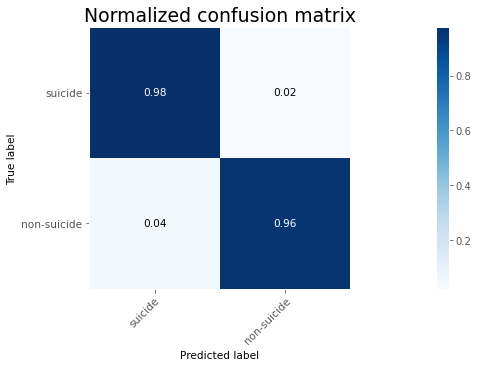

In [10]:
# Get prediction form model on validation data. This is where you should use
# your test data.
true_labels, predictions_labels, avg_epoch_loss = validation(valid_dataloader, device)

# Create the evaluation report.
evaluation_report = classification_report(true_labels, predictions_labels, labels=list(labels_ids.values()), target_names=list(labels_ids.keys()))
# Show the evaluation report.
print(evaluation_report)
print(len(predictions_labels))
# Plot confusion matrix.
plot_confusion_matrix(y_true=true_labels, y_pred=predictions_labels, 
                      classes=list(labels_ids.keys()), normalize=True, 
                      magnify=0.1,
                      );

## Predict

use loadText(string) to enter text you want to predict

In [11]:
def predictText(text):


  # create virtual loader
  test_d =  virtualLoad()
  # add text to predict
  test_d.loadText(text) 

  # Move pytorch dataset into dataloader.
  test_loader = DataLoader(test_d, batch_size=batch_size, shuffle=False, collate_fn=gpt2_classificaiton_collator)

  # Run prediction
  output = predict(test_loader, device)
  iter = 0
  for item in output:
    print('"'+test_d.getText(iter)+'"')
    print(list(labels_ids.keys())[list(labels_ids.values()).index(item)])
    iter = iter + 1


predictText("i want to die") 
predictText("I hate everything and want to kill myself and i'm so sick of living and i'm in debt i hate it")
predictText("Does anyone know where i can find the closest local google bahamas server?")
predictText("my girlfriend left me. my wife left me. My cat cheated on me with an elephant. Life sucks and it's not worth living")


"i want to die"
suicide



"I hate everything and want to kill myself and i'm so sick of living and i'm in debt i hate it"
suicide



"Does anyone know where i can find the closest local google bahamas server?"
non-suicide



"my girlfriend left me. my wife left me. My cat cheated on me with an elephant. Life sucks and it's not worth living"
suicide


## Save



In [12]:
torch.save(model, "Suicide_Detection.model")

## Download a pre-trained Suicide_Detection model


In [17]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XmCSsOd1kJHHi1x0DrSx9k14mEn7qrbl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XmCSsOd1kJHHi1x0DrSx9k14mEn7qrbl" -O Suicide_Detection.model && rm -rf /tmp/cookies.txt

--2021-06-26 18:07:25--  https://docs.google.com/uc?export=download&confirm=Tlrx&id=1XmCSsOd1kJHHi1x0DrSx9k14mEn7qrbl
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.138, 142.251.2.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-34-docs.googleusercontent.com/docs/securesc/bsi5ur10e4fdr020e4s65io7geajhsk4/ami6cvf9ajo62ugakhd4rmvm8kf5f7q7/1624730775000/07047829658875637856/14197453058687678609Z/1XmCSsOd1kJHHi1x0DrSx9k14mEn7qrbl?e=download [following]
--2021-06-26 18:07:25--  https://doc-0s-34-docs.googleusercontent.com/docs/securesc/bsi5ur10e4fdr020e4s65io7geajhsk4/ami6cvf9ajo62ugakhd4rmvm8kf5f7q7/1624730775000/07047829658875637856/14197453058687678609Z/1XmCSsOd1kJHHi1x0DrSx9k14mEn7qrbl?e=download
Resolving doc-0s-34-docs.googleusercontent.com (doc-0s-34-docs.googleusercontent.com)... 172.217.3.1, 2607:f8b0:4026:800::2001
Connecting to d

# Load and Predict

In [15]:
# Load and Initialize Model
model = torch.load('Suicide_Detection.model')
model.eval()

# Look for gpu to use. Will use `cpu` by default if no gpu found.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to device
model.to(device)

# Run predictor
predictText("it's so annoying that i don't know what my score is lmao. meanwhile others taken it in 4 weeks and are walking around with 250's Im like, lmao 235 come at me at this rate") 
predictText("Lmao i'm sorry. I'm depressed as shit. Anxious as shit. Stressed as shit. I am trying my best honestly.") 


"it's so annoying that i don't know what my score is lmao. meanwhile others taken it in 4 weeks and are walking around with 250's Im like, lmao 235 come at me at this rate"
non-suicide



"Lmao i'm sorry. I'm depressed as shit. Anxious as shit. Stressed as shit. I am trying my best honestly."
suicide


## **Final Note**

If you made it this far **Congrats!** 🎊 and **Thank you!** 🙏 for your interest in my tutorial!

I've been using this code for a while now and I feel it got to a point where is nicely documented and easy to follow.

Of course is easy for me to follow because I built it. That is why any feedback is welcome and it helps me improve my future tutorials!

If you see something wrong please let me know by opening an issue on my [ml_things GitHub repository](https://github.com/gmihaila/ml_things/issues)!

A lot of tutorials out there are mostly a one-time thing and are not being maintained. I plan on keeping my tutorials up to date as much as I can.

## **Contact** 🎣

🦊 GitHub: [gmihaila](https://github.com/gmihaila)

🌐 Website: [gmihaila.github.io](https://gmihaila.github.io/)

👔 LinkedIn: [mihailageorge](https://www.linkedin.com/in/mihailageorge/)

📓 Medium: [@gmihaila](https://gmihaila.medium.com)

📬 Email: [georgemihaila@my.unt.edu.com](mailto:georgemihaila@my.unt.edu.com?subject=GitHub%20Website)
